# IMPORT LIBRARIES

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%pip install imblearn
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree



Note: you may need to restart the kernel to use updated packages.


# DATA PRE-PROCESSING AND CLEANING

In [74]:
df=pd.read_csv("diabetes.csv")

In [75]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.60,0.13,47,1
1,0,84,82,31,125,38.20,0.23,23,0
2,0,145,0,0,0,44.20,0.63,31,1
3,0,135,68,42,250,42.30,0.36,24,1
4,1,139,62,41,480,40.70,0.54,21,0


In [76]:
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.70,0.37,33,0
1996,8,179,72,42,130,32.70,0.72,36,1
1997,6,85,78,0,0,31.20,0.38,42,0
1998,0,129,110,46,130,67.10,0.32,26,1
1999,2,81,72,15,76,30.10,0.55,25,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [78]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# DATA EXPLORATION

In [79]:
print("Diabetes data set dimensions : {}".format(df.shape))
df.groupby('Outcome').size()

Diabetes data set dimensions : (2000, 9)


Outcome
0    1316
1     684
dtype: int64

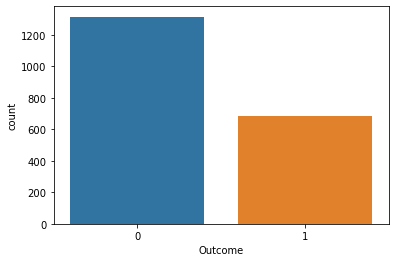

In [80]:
sns.countplot(x="Outcome", data=df); #countig outcome

In [81]:
df['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [82]:
# THE DATASET IS IMBALANCED SO SOME PURPOSEFUL RANDOM UNDER-SAMPLING OF OUTCOME == 0 WILL BE CARRIED OUT

In [83]:
# Random under-sampleing
df2 = df.loc[df['Outcome']==0].sample(n=850).copy()
# All individuals with diabetes
df3 = df.loc[df['Outcome']==1].copy()
# Concat all individuals, with new index on rows
df4 = pd.concat([df2,df3], ignore_index=True)
# Shuffle rows randomly
df4 = df4.sample(frac=1)
# Reset index of every row
df4.reset_index(drop=True, inplace=True)
df4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,119,88,41,170,45.30,0.51,26,0
1,1,135,54,0,0,26.70,0.69,62,0
2,7,109,80,31,0,35.90,1.13,43,1
3,1,139,62,41,480,40.70,0.54,21,0
4,2,93,64,32,160,38.00,0.67,23,1
...,...,...,...,...,...,...,...,...,...
1529,2,128,64,42,0,40.00,1.10,24,0
1530,5,122,86,0,0,34.70,0.29,33,0
1531,4,132,86,31,0,28.00,0.42,63,0
1532,0,138,60,35,167,34.60,0.53,21,1


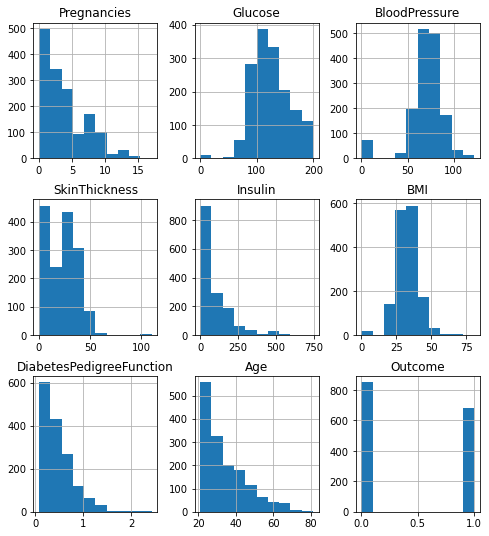

In [84]:
df4.hist(bins = 10, figsize = (8,9))#looking all data set
plt.show()

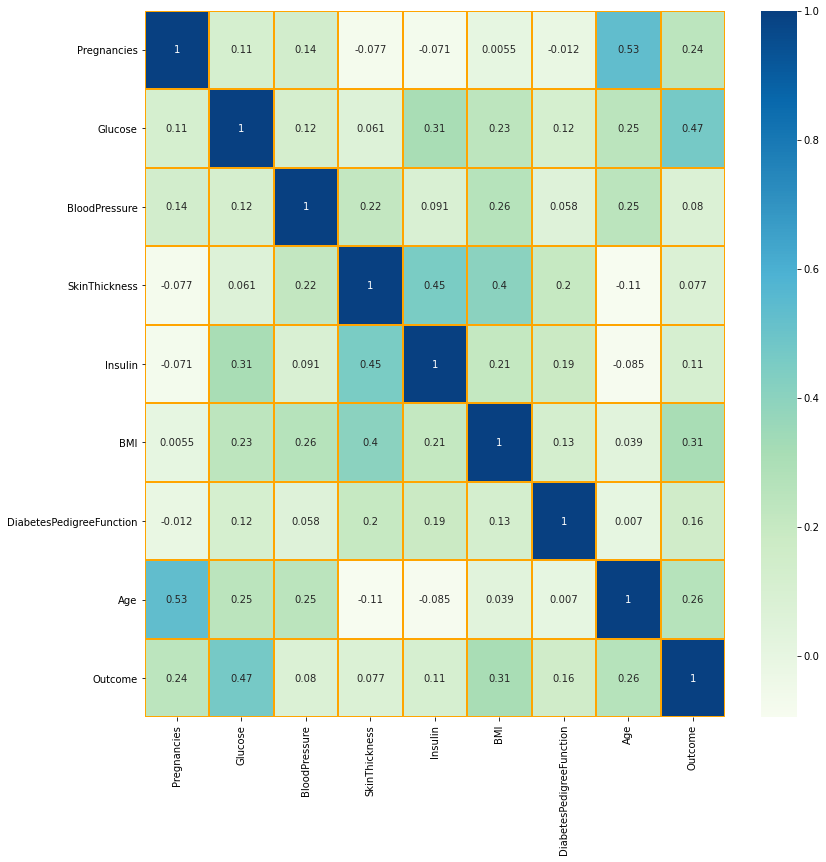

In [85]:
plt.figure(figsize = (13,13))
sns.heatmap(df4.corr(),robust=True,fmt='.2g',linewidths=1,linecolor = 'orange', annot=True, cmap='GnBu'); #heat map

<Figure size 936x936 with 0 Axes>

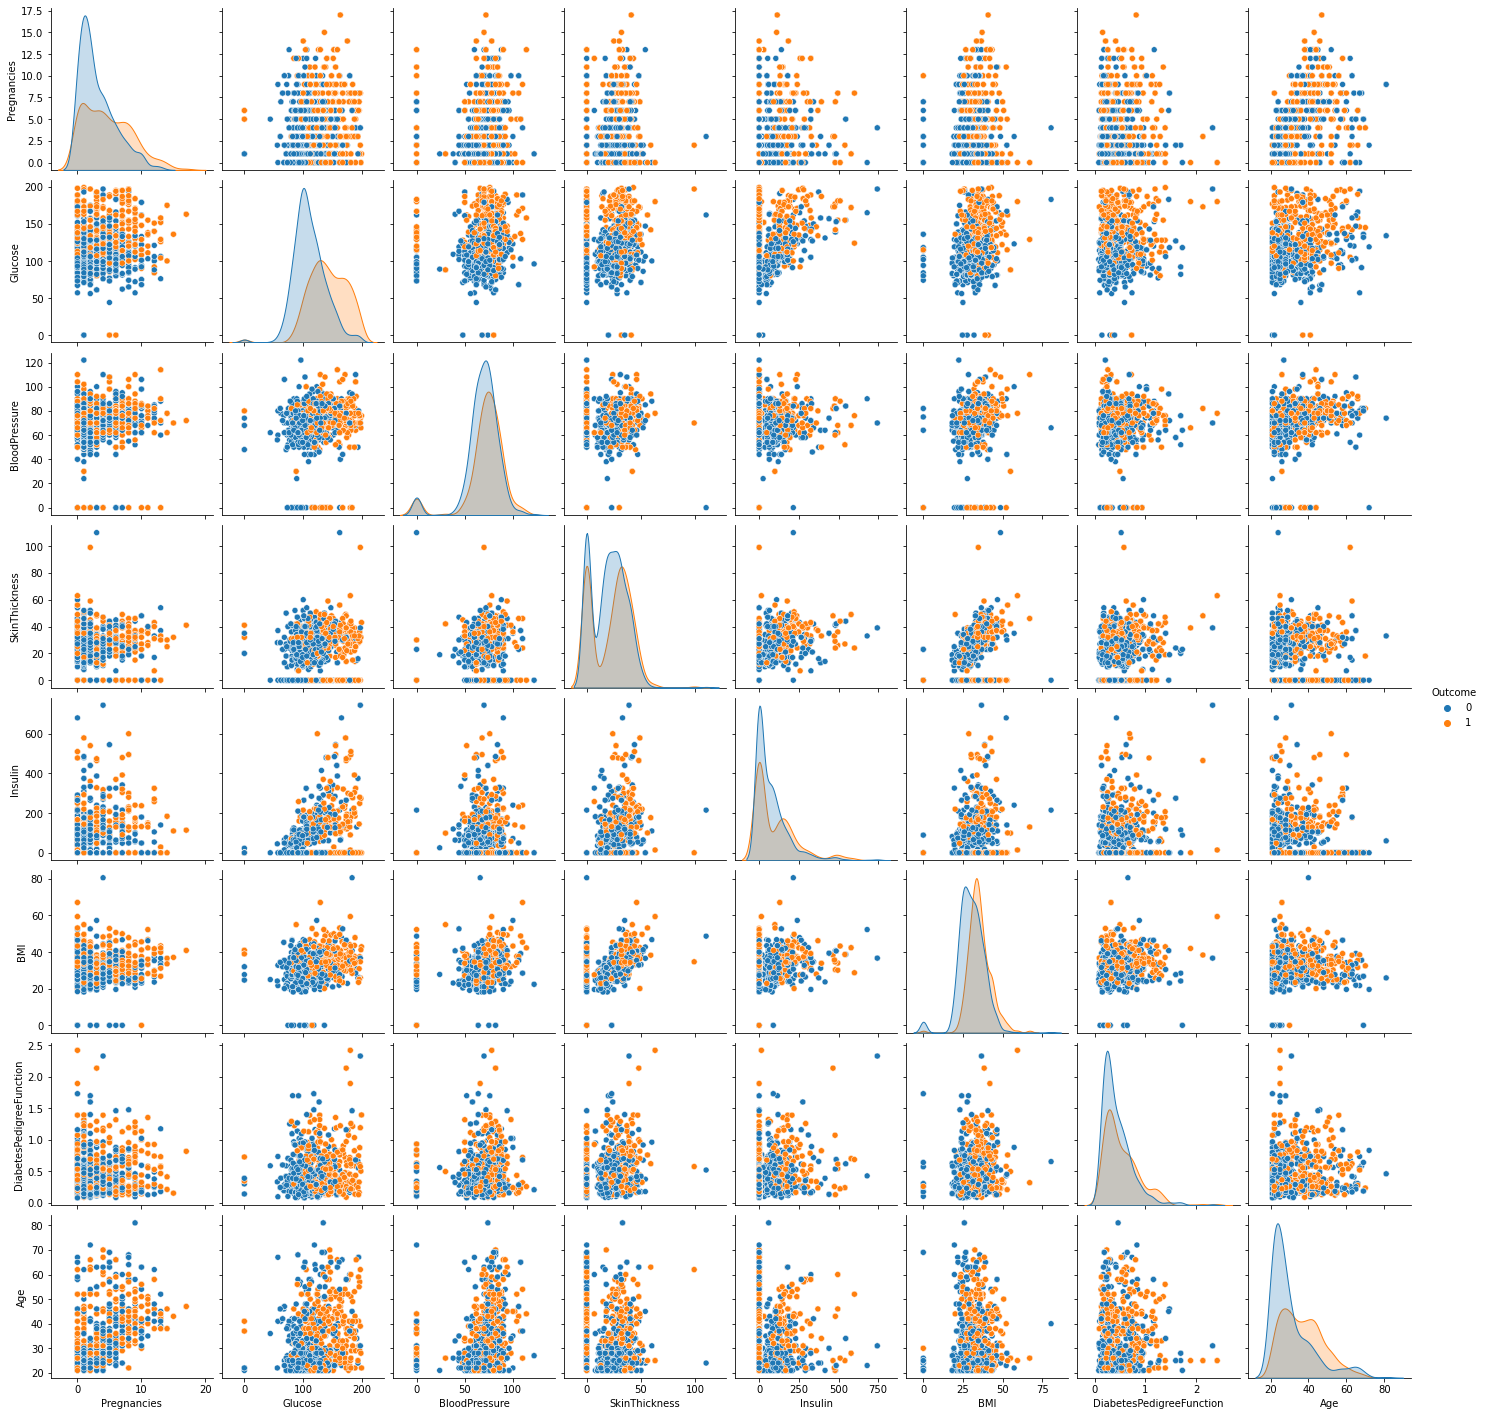

In [86]:
plt.figure(figsize=(13,13))
sns.pairplot(df4, hue='Outcome');

In [87]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1534.00,3.83,3.36,0.00,1.00,3.00,6.00,17.00
Glucose,1534.00,124.31,33.11,0.00,100.25,121.00,146.00,199.00
BloodPressure,1534.00,69.42,19.67,0.00,64.00,72.00,80.00,122.00
SkinThickness,1534.00,21.23,16.36,0.00,0.00,23.00,33.00,110.00
Insulin,1534.00,84.14,116.92,0.00,0.00,37.00,135.00,744.00
BMI,1534.00,32.49,8.10,0.00,27.60,32.50,36.90,80.60
DiabetesPedigreeFunction,1534.00,0.48,0.33,0.08,0.25,0.38,0.64,2.42
Age,1534.00,33.57,11.67,21.00,24.00,30.00,41.00,81.00
Outcome,1534.00,0.45,0.50,0.00,0.00,0.00,1.00,1.00


In [91]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' ,'BMI', 'DiabetesPedigreeFunction', 'Age' ]
def c_dis_plot(df4, cols):
    for col in cols:
        sns.distplot(df4[col])
        plt.axvline(df4[col].mean(),color='r',label='mean',linestyle='--')
        plt.axvline(np.median(df4[col]),color='y',label='median')
        plt.axvline((df4[col].mode())[0],color='g',label='mode')
        plt.legend()
        plt.show();


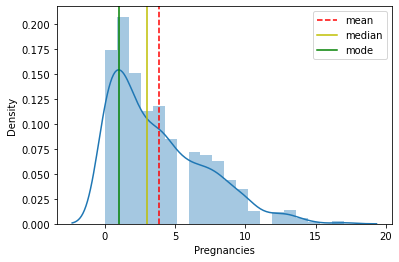

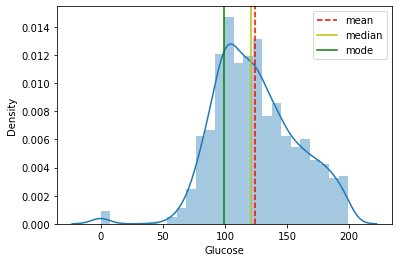

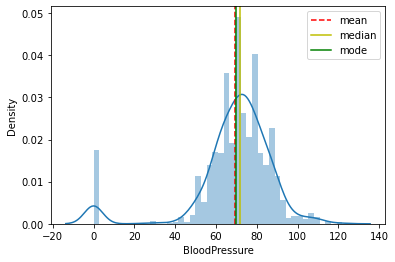

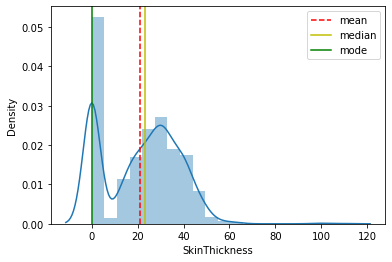

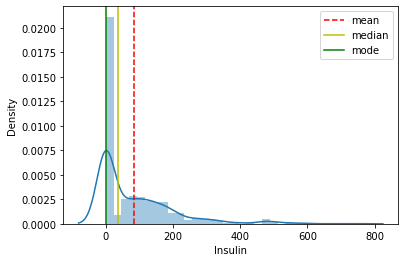

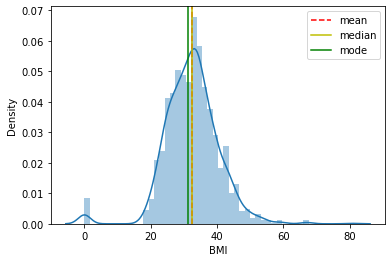

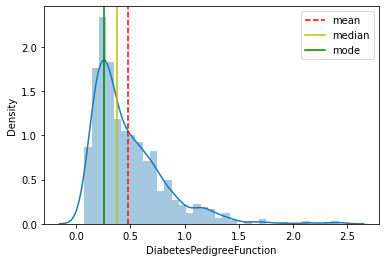

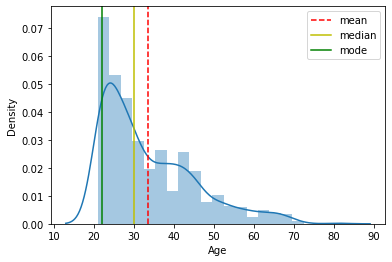

In [92]:

c_dis_plot(df4,cols)

# RUNNING THE ALGORITHMS


In [93]:
y = df4["Outcome"]
X = df4.drop('Outcome',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [94]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Gaussian Naive Bayes

In [95]:
a1 = 'Gaussian Naive Bayes'
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predicted = gnb.predict(X_test)
gnb_acc_score = gnb.score(X_test, y_test)
gnb_acc_score

0.7462039045553145

In [96]:
print(f'Accuracy of Gaussain Naive Bayes: {gnb_acc_score}')
print(classification_report(y_test,gnb_predicted))

Accuracy of Gaussain Naive Bayes: 0.7462039045553145
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       256
           1       0.73      0.68      0.71       205

    accuracy                           0.75       461
   macro avg       0.74      0.74      0.74       461
weighted avg       0.75      0.75      0.75       461



In [97]:
gnb_tun_score= cross_val_score(gnb,X_test,y_test, cv=10).mean()
gnb_tun_score

0.7592044403330249

## Decision Tree Classifier

In [98]:
a2 = 'Decision Tree Classifier'
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predicted = dtc.predict(X_test)
dtc_acc_score = dtc.score(X_test, y_test)
dtc_acc_score

0.9197396963123644

In [99]:
print(f'Accuracy of Decision Tree Classifier: {dtc_acc_score}')
print(classification_report(y_test,dtc_predicted))

Accuracy of Decision Tree Classifier: 0.9197396963123644
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       256
           1       0.90      0.92      0.91       205

    accuracy                           0.92       461
   macro avg       0.92      0.92      0.92       461
weighted avg       0.92      0.92      0.92       461



In [100]:
dtc_params = {"max_depth": np.arange(1,15),
             "min_samples_split": np.arange(2,16,2)}

In [101]:
dtc = DecisionTreeClassifier()

dtc_cv_model = GridSearchCV(dtc, 
                           dtc_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2)

In [102]:
dtc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 98 candidates, totalling 980 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14])},
             verbose=2)

In [103]:
print("Best parameter: " + str(dtc_cv_model.best_params_))

Best parameter: {'max_depth': 14, 'min_samples_split': 2}


In [104]:
dtc_tuned = DecisionTreeClassifier(max_depth = 12,                                  
                                  min_samples_split = 2
                                  )

dtc_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [105]:
dtc_pred = dtc_tuned.predict(X_test)
dtc_tuned_score=accuracy_score(y_test, dtc_pred)
dtc_tuned_score

0.9045553145336226

## Random Forests 

In [106]:

a3 = 'Random Forests'
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model
rf_predicted = rf_model.predict(X_test)
rf_conf_matrix =confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forests:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[241  15]
 [ 12 193]]


Accuracy of Random Forests: 94.14316702819957 

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       256
           1       0.93      0.94      0.93       205

    accuracy                           0.94       461
   macro avg       0.94      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [107]:
#model Tunning
rf_params = {"max_depth": [2,5,8,12],
            "max_features": [2,5,8],
            "n_estimators": [100,200,500],
            "min_samples_split": [2,5,10]}

In [108]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2)

In [109]:
rf_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 12], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [110]:
print("Best parameter: " + str(rf_cv_model.best_params_))

Best parameter: {'max_depth': 12, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [111]:
rf_tuned = RandomForestClassifier(max_depth = 12, 
                                  max_features = 5, 
                                  min_samples_split = 2,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=5, n_estimators=500)

In [112]:
rf_pred = rf_tuned.predict(X_test)
rf_tuned_score=accuracy_score(y_test, rf_pred)
rf_tuned_score

0.9436008676789588

## Logistic Regression

In [113]:
a4 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[211  45]
 [ 65 140]]


Accuracy of Logistic Regression: 76.13882863340564 

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       256
           1       0.76      0.68      0.72       205

    accuracy                           0.76       461
   macro avg       0.76      0.75      0.76       461
weighted avg       0.76      0.76      0.76       461



In [114]:
lr_tun_score= cross_val_score(model,X_test,y_test, cv=10).mean()
lr_tun_score


0.7548103607770583

## K-Neighbours Classifier

In [115]:
a5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[220  36]
 [ 58 147]]


Accuracy of K-NeighborsClassifier: 79.60954446854663 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       256
           1       0.80      0.72      0.76       205

    accuracy                           0.80       461
   macro avg       0.80      0.79      0.79       461
weighted avg       0.80      0.80      0.79       461



In [116]:
# model tuning

knn = KNeighborsClassifier()
knn_params={'n_neighbors':np.arange(1,50)}
knn_cv_model=GridSearchCV(knn, knn_params,cv=10).fit(X_train, y_train)




In [117]:
knn_cv_model.best_params_

{'n_neighbors': 1}

In [118]:
knn_tuned=KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn_predicted = knn_tuned.predict(X_test)

knn_tuned_score=accuracy_score(y_test, knn_predicted)
knn_tuned_score


0.928416485900217

## Support Vector Classifier

In [119]:
a6 = 'Support Vector Classifier'
svc =  SVC()
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix =confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[219  37]
 [ 48 157]]


Accuracy of Support Vector Classifier: 81.56182212581345 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       256
           1       0.81      0.77      0.79       205

    accuracy                           0.82       461
   macro avg       0.81      0.81      0.81       461
weighted avg       0.82      0.82      0.82       461



In [120]:
# model yuning
svc =  SVC()
svc_params= { 'C': np.arange(1,10), 'kernel': ['linear', 'rbf' ]}
svc_cv_model = GridSearchCV(svc, svc_params, cv=5, n_jobs=-1, verbose=2 ).fit(X_train, y_train)
svc_cv_model



Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [121]:
svc_cv_model.best_params_

{'C': 9, 'kernel': 'rbf'}

In [122]:
svc_tuned=SVC(C=10, kernel='rbf').fit(X_train, y_train)
svc_predicted = svc_tuned.predict(X_test)

svc_tuned_score=accuracy_score(y_test, svc_predicted)
svc_tuned_score

0.8264642082429501

# COMPARING ACCURACIES OF THE VARIOUS ALGORITHMS

In [123]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Support Vector Machine', 'Random Forests', 'Gaussian Naive Bayes', 'Decision Tree Classifier'], 
                         'Accuracy': [lr_acc_score*100,knn_acc_score*100,svc_acc_score*100, rf_acc_score*100, gnb_acc_score*100, dtc_acc_score*100 ],
                        'Tunned Accuracy': [lr_tun_score*100, knn_tuned_score*100, svc_tuned_score*100, rf_tuned_score*100, gnb_tun_score*100,dtc_tuned_score*100]})
model_ev

,Model,Accuracy,Tunned Accuracy
0,Logistic Regression,76.14,75.48
1,K-Nearest Neighbour,79.61,92.84
2,Support Vector Machine,81.56,82.65
3,Random Forests,94.14,94.36
4,Gaussian Naive Bayes,74.62,75.92
5,Decision Tree Classifier,91.97,90.46


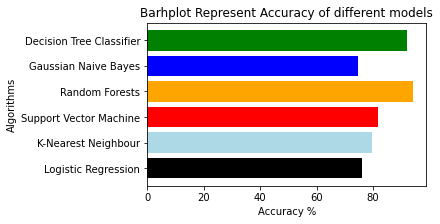

In [124]:
colors = ['black','lightblue','red', 'orange', 'blue', 'green']
plt.figure(figsize=(5,3))
plt.title("Barhplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.barh(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [125]:
model_ev1 = pd.DataFrame({'Model tuned': ['Logistic Regression','K-Nearest Neighbour','Support Vector Machine', 'Random Forests', 'Gaussian Naive Bayes', 'Decision Tree Classifier'], 
                          'Tunned Accuracy': [lr_tun_score*100,knn_tuned_score*100,svc_tuned_score*100,rf_tuned_score*100, gnb_tun_score*100, dtc_tuned_score*100]})
model_ev1

,Model tuned,Tunned Accuracy
0,Logistic Regression,75.48
1,K-Nearest Neighbour,92.84
2,Support Vector Machine,82.65
3,Random Forests,94.36
4,Gaussian Naive Bayes,75.92
5,Decision Tree Classifier,90.46


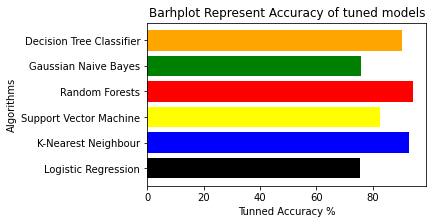

In [126]:
colors = ['black','blue','yellow','red', 'green', 'orange']
plt.figure(figsize=(5,3))
plt.title("Barhplot Represent Accuracy of tuned models")
plt.xlabel("Tunned Accuracy %")
plt.ylabel("Algorithms")
plt.barh(model_ev1['Model tuned'],model_ev1[ 'Tunned Accuracy'],color = colors)
plt.show()

# CREATING COFUSION MATRICES FOR THE VARIOUS ALGORITHMS


In [127]:
dtc = DecisionTreeClassifier(max_depth = 12,                                  
                                  min_samples_split = 2)
dtc.fit(X_train,y_train)
y_head_dtc = dtc.predict(X_test)

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_head_gnb = gnb.predict(X_test)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_head_knn = knn.predict(X_test)

svc = SVC(kernel='rbf', C=6)
svc.fit(X_train,y_train)
y_head_svm = svc.predict(X_test)

lr = LogisticRegression()
loj_model=lr.fit(X_train, y_train)
lr_predict = loj_model.predict(X_test)


rf=RandomForestClassifier(max_depth = 12, max_features = 5, min_samples_split = 2, n_estimators = 500)
rf.fit(X_train, y_train)
y_head_rf=rf.predict(X_test)


In [128]:
cm_gnb = confusion_matrix(y_test,y_head_gnb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_lr = confusion_matrix(y_test,lr_predict)



Text(15.0, 0.5, 'true label')

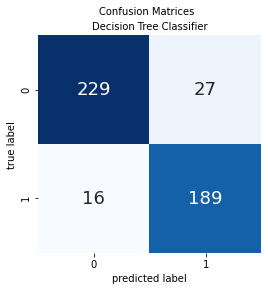

In [129]:
plt.figure(figsize=(4,4))
plt.suptitle("Confusion Matrices",fontsize=10, color="Black")
plt.subplots_adjust(wspace = 0.6, hspace= 0.6)



plt.title("Decision Tree Classifier",fontsize=10,color="black")
sns.heatmap(cm_dtc,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.xlabel("predicted label")
plt.ylabel("true label")

Text(15.0, 0.5, 'true label')

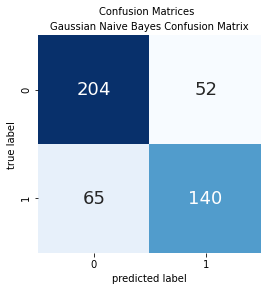

In [130]:
plt.figure(figsize=(4,4))
plt.suptitle("Confusion Matrices",fontsize=10, color="Black")
plt.subplots_adjust(wspace = 0.6, hspace= 0.6)



plt.title("Gaussian Naive Bayes Confusion Matrix",fontsize=10,color="black")
sns.heatmap(cm_gnb,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.xlabel("predicted label")
plt.ylabel("true label")


Text(15.0, 0.5, 'true label')

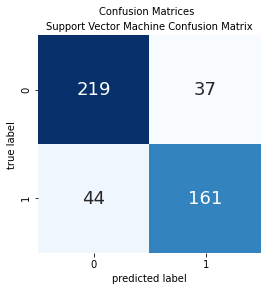

In [131]:


plt.figure(figsize=(4,4))
plt.suptitle("Confusion Matrices",fontsize=10, color="Black")
plt.subplots_adjust(wspace = 0.6, hspace= 0.6)



plt.title("Support Vector Machine Confusion Matrix",fontsize=10,color="black")
sns.heatmap(cm_svm,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.xlabel("predicted label")
plt.ylabel("true label")




Text(15.0, 0.5, 'true label')

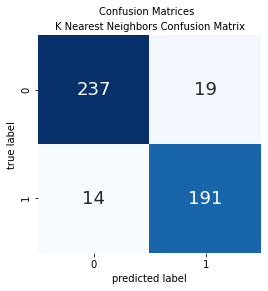

In [132]:
plt.figure(figsize=(4,4))
plt.suptitle("Confusion Matrices",fontsize=10, color="Black")
plt.subplots_adjust(wspace = 0.6, hspace= 0.6)

plt.subplot()
plt.title("K Nearest Neighbors Confusion Matrix",fontsize=10,color="black")
sns.heatmap(cm_knn,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.xlabel("predicted label")
plt.ylabel("true label")


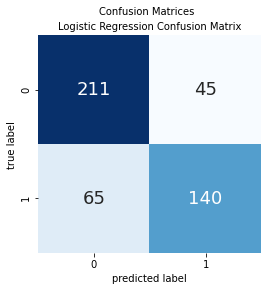

In [133]:
plt.figure(figsize=(4,4))
plt.suptitle("Confusion Matrices",fontsize=10, color="Black")
plt.subplots_adjust(wspace = 0.6, hspace= 0.6)
plt.title("Logistic Regression Confusion Matrix",fontsize=10,color="black")
sns.heatmap(cm_lr,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

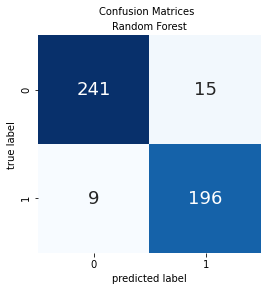

In [134]:
plt.figure(figsize=(4,4))
plt.suptitle("Confusion Matrices",fontsize=10, color="Black")
plt.subplots_adjust(wspace = 0.6, hspace= 0.6)
plt.title("Random Forest",fontsize=10,color="black")
sns.heatmap(cm_rf,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()